# Name : Tharindu O.K.D
# Index No. : 190622R

### Question 01

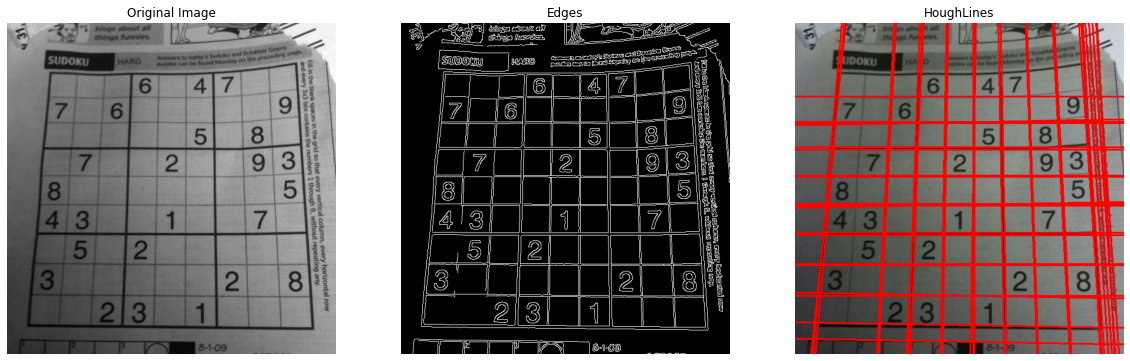

In [70]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("sudoku.png", cv.IMREAD_COLOR)
assert img is not None

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 50, 120, apertureSize=3)
lines = cv.HoughLines(edges, 1, np.pi/180, 175)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0, y0 = a*rho, b*rho
    x1, y1 = int(x0 + 1000*(-b)), int(y0 + 1000*(a))
    x2, y2 = int(x0 - 1000*(-b)), int(y0 - 1000*(a))
    cv.line(img, (x1,y1), (x2,y2), (0,0,255), 2)
fig, ax = plt.subplots(1, 3, figsize=(20,10))
ax[0].imshow(gray,cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(edges, cmap="gray")
ax[1].set_title("Edges")
ax[2].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[2].set_title("HoughLines")
for i in range(3):
    ax[i].axis("off")
plt.show()


### Question 02

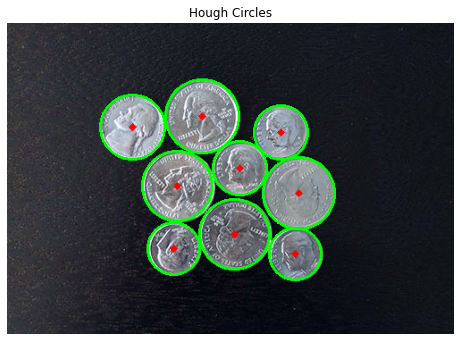

In [76]:
img = cv.imread("coins.jpg", cv.IMREAD_COLOR)
assert img is not None

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT, 1, 50, param1=150, param2=20, minRadius=19, maxRadius=44)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    cv.circle(img,(i[0],i[1]),2,(255,0,0),3)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.set_title("Hough Circles")
ax.axis("off")
plt.show()


### Question 03

x = 29.0, y = 109.0, scale = 1.0, orientation = 0.0, p1 = (4, 76), p2 = (54, 141)


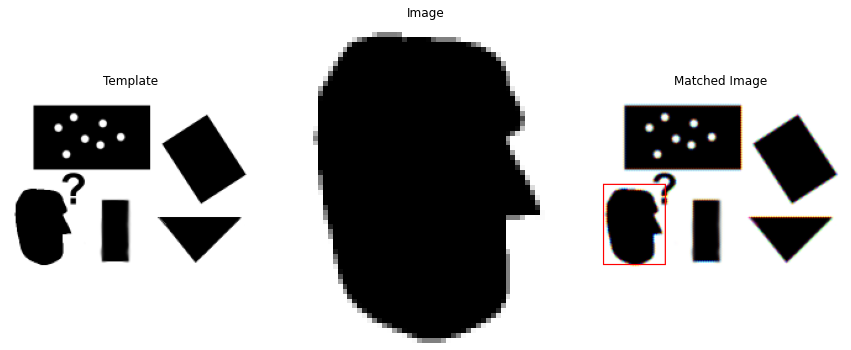

In [87]:
img = cv.imread("pic1.png", cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None
temp = cv.imread("templ.png", cv.IMREAD_REDUCED_GRAYSCALE_2)
assert temp is not None

img_edges = cv.Canny(img, 50, 250)
temp_edges = cv.Canny(temp, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(temp_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
posistion, votes = alg.detect(img_edges)

out = cv.cvtColor(img, cv.COLOR_BAYER_BG2BGR)

for x, y, scale, orientation in posistion[0]:
    halfHeight = temp.shape[0] / 2. * scale
    halfWidth = temp.shape[1] /2. *scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    print("x = {}, y = {}, scale = {}, orientation = {}, p1 = {}, p2 = {}".format(x,y,scale,orientation,p1,p2))
    cv.rectangle(out, p1, p2, (0,0,255))
fig, ax = plt.subplots(1, 3, figsize=(15,15))
ax[0].imshow(img,cmap="gray")
ax[0].set_title("Template")
ax[1].imshow(temp, cmap="gray")
ax[1].set_title("Image")
ax[1].set_aspect('equal')
ax[2].imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
ax[2].set_title("Matched Image")
for i in range(3):
    ax[i].axis("off")
plt.show()


### Question 04

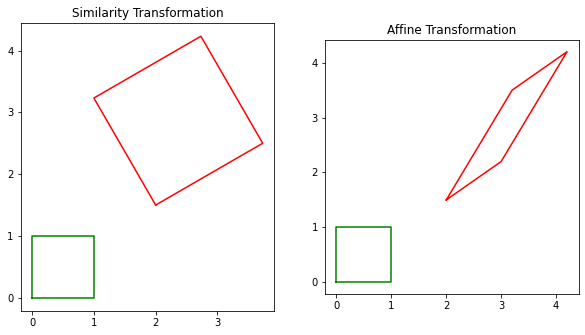

In [117]:
a, b, c, d = [0, 0 ,1], [0, 1, 1], [1, 1, 1], [1, 0, 1]
X = np.array([a,b,c,d]).T

theta = np.pi*30/180
s=2
tx, ty = 2, 1.5
H = np.array([[s*np.cos(theta), -s*np.sin(theta), tx], [s*np.sin(theta), s*np.cos(theta), ty], [0, 0, 1]])

a11, a12, a21, a22 = 1, 1.2, 0.7, 2
A = np.array([[a11, a12, tx], [a21, a22, ty], [0, 0, 1]])
Transformations = np.array([H, A])
names = ["Similarity Transformation", "Affine Transformation"]
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
for i in range(2):
    Y = Transformations[i] @ X
    x = np.append(X[0,:], X[0,0])
    y = np.append(X[1,:], X[1,0])
    x_ = np.append(Y[0,:], Y[0,0])
    y_ = np.append(Y[1,:], Y[1,0])

    ax[i].plot(x, y, color='g')
    ax[i].set_aspect('equal')
    ax[i].plot(x_, y_, color='r')
    ax[i].set_aspect('equal')
    ax[i].set_title(names[i])
plt.show()
